In [1]:
import numpy as np

In [2]:
# n is the final day
def create_two_state_task_graph(num_days, do_cost=2, procrastinate_cost=1):
    n=num_days
    adj_list = {}
    
    for i in range(0,n):
        if i==0:
            adj_list['S'] = [('D'+str(i+1),do_cost), ('P'+str(i+1),procrastinate_cost)]
        else:
            adj_list['D'+str(i)] = [('D'+str(i+1),0)]
            if i+1 != n:
                adj_list['P'+str(i)] = [('D'+str(i+1),do_cost), ('P'+str(i+1),procrastinate_cost)]
            else:
                adj_list['P'+str(i)] = [('D'+str(i+1),do_cost)]

    adj_list['D'+str(n)] = []
    adj_list['D'+str(n)] = []

    return adj_list

In [3]:
adj_list = create_two_state_task_graph(6, do_cost=2, procrastinate_cost=1)
adj_list

{'S': [('D1', 2), ('P1', 1)],
 'D1': [('D2', 0)],
 'P1': [('D2', 2), ('P2', 1)],
 'D2': [('D3', 0)],
 'P2': [('D3', 2), ('P3', 1)],
 'D3': [('D4', 0)],
 'P3': [('D4', 2), ('P4', 1)],
 'D4': [('D5', 0)],
 'P4': [('D5', 2), ('P5', 1)],
 'D5': [('D6', 0)],
 'P5': [('D6', 2)],
 'D6': []}

In [4]:
pos={}
p_idx = 0.5
d_idx = 0.5
for node in adj_list:
    if node[0] == 'S':
        pos[node]=(0,0.5)
    elif node[0] == 'P':
        pos[node]=(p_idx,0)
        p_idx+=0.5
    else:
        pos[node]=(d_idx,1)
        d_idx+=0.5
pos

{'S': (0, 0.5),
 'D1': (0.5, 1),
 'P1': (0.5, 0),
 'D2': (1.0, 1),
 'P2': (1.0, 0),
 'D3': (1.5, 1),
 'P3': (1.5, 0),
 'D4': (2.0, 1),
 'P4': (2.0, 0),
 'D5': (2.5, 1),
 'P5': (2.5, 0),
 'D6': (3.0, 1)}

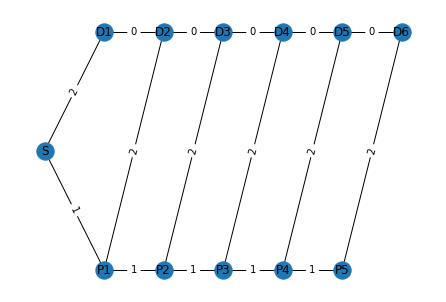

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new graph
G = nx.Graph()

# Add edges and weights to the graph
for node, neighbors in adj_list.items():
    for neighbor, weight in neighbors:
        G.add_edge(node, neighbor, weight=weight)

# Draw the graph
nx.draw(G, pos, with_labels=True)  # draw nodes
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))  # draw edge labels
plt.show()

In [6]:
import heapq

def dijkstra(graph, start, end):
    # Initialize the distance dictionary with infinite distances for all nodes
    distances = {node: float('inf') for node in graph}
    distances[start] = 0  # The start node is at distance 0

    # Initialize the priority queue with the start node
    queue = [(0, start)]

    while queue:
        # Get the node with the smallest distance from the queue
        current_distance, current_node = heapq.heappop(queue)

        # If this path is worse than the best known one, ignore it
        if current_distance > distances[current_node]:
            continue

        # Update distances for all neighbors
        for neighbor, weight in graph[current_node]:
            distance = current_distance + weight

            # If we found a shorter path to the neighbor, update it
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                # Add the neighbor to the queue with the new distance
                heapq.heappush(queue, (distance, neighbor))

    return distances[end]

In [7]:
adj_list

{'S': [('D1', 2), ('P1', 1)],
 'D1': [('D2', 0)],
 'P1': [('D2', 2), ('P2', 1)],
 'D2': [('D3', 0)],
 'P2': [('D3', 2), ('P3', 1)],
 'D3': [('D4', 0)],
 'P3': [('D4', 2), ('P4', 1)],
 'D4': [('D5', 0)],
 'P4': [('D5', 2), ('P5', 1)],
 'D5': [('D6', 0)],
 'P5': [('D6', 2)],
 'D6': []}

In [8]:
# Let's see for the rational agent without present bias
vertex = 'S'
goal_vertex = 'D6'
total_cost = 0
traverse_path = ['S']
while(vertex!=goal_vertex):
    cost = []
    for next_vertex in adj_list[vertex]:
        next_vertex_cost = next_vertex[1]
        next_vertex_to_goal = dijkstra(adj_list, next_vertex[0], goal_vertex)
        cost.append(next_vertex_cost + next_vertex_to_goal)
    
    optim_cost_idx = np.argmin(cost)

    optimal_next_vertex = adj_list[vertex][optim_cost_idx]
    traverse_path.append(optimal_next_vertex[0])
    vertex = optimal_next_vertex[0]

    total_cost+=optimal_next_vertex[1]

print(traverse_path, total_cost)


        

['S', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6'] 2


In [9]:
dijkstra(adj_list, 'P1', 'D6')

2

In [10]:
def _traverse_without_bias(adj_list, goal_vertex):
# Let's see for the rational agent without present bias
    vertex = 'S'
    goal_vertex = 'D6'
    total_cost = 0
    traverse_path = ['S']
    while(vertex!=goal_vertex):
        cost = []
        for next_vertex in adj_list[vertex]:
            next_vertex_cost = next_vertex[1]
            next_vertex_to_goal = dijkstra(adj_list, next_vertex[0], goal_vertex)
            cost.append(next_vertex_cost + next_vertex_to_goal)
        
        optim_cost_idx = np.argmin(cost)

        optimal_next_vertex = adj_list[vertex][optim_cost_idx]
        traverse_path.append(optimal_next_vertex[0])
        vertex = optimal_next_vertex[0]
        total_cost += optimal_next_vertex[1]


    return traverse_path, total_cost

_traverse_without_bias(adj_list, 'D6')

(['S', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6'], 2)

In [11]:
def _traverse_with_constant_bias(adj_list, goal_vertex, bias_factor):
# Let's see for the rational agent without present bias
    vertex = 'S'
    goal_vertex = 'D6'
    total_cost = 0
    traverse_path = ['S']
    while(vertex!=goal_vertex):
        cost = []
        for next_vertex in adj_list[vertex]:
            if next_vertex[0][0]=='D':
                next_vertex_cost = next_vertex[1]*bias_factor
            else:
                next_vertex_cost = next_vertex[1]

            next_vertex_to_goal = dijkstra(adj_list, next_vertex[0], goal_vertex)
            cost.append(next_vertex_cost + next_vertex_to_goal)
        
        optim_cost_idx = np.argmin(cost)

        optimal_next_vertex = adj_list[vertex][optim_cost_idx]
        traverse_path.append(optimal_next_vertex[0])
        vertex = optimal_next_vertex[0]
        total_cost += optimal_next_vertex[1]


    return traverse_path, total_cost

_traverse_with_constant_bias(adj_list, 'D6', 2)

(['S', 'P1', 'P2', 'P3', 'P4', 'P5', 'D6'], 7)

In [12]:
# Get IID for bias factor
outcomes = [1, 3]
probabilities = [1/3, 2/3]
np.random.choice(outcomes, p=probabilities)

3

In [13]:
def _traverse_with_variable_bias(adj_list, goal_vertex, bias_factor):
# Let's see for the rational agent without present bias
    vertex = 'S'
    total_cost = 0
    traverse_path = ['S']
    while(vertex!=goal_vertex):
        cost = []
        for next_vertex in adj_list[vertex]:
            if next_vertex[0][0]=='D':
                # Get value from IID for bias factor
                outcomes = [1, 3]
                probabilities = [1/3, 2/3]
                bias_factor = np.random.choice(outcomes, p=probabilities)
                next_vertex_cost = next_vertex[1]*bias_factor
            else:
                next_vertex_cost = next_vertex[1]

            next_vertex_to_goal = dijkstra(adj_list, next_vertex[0], goal_vertex)
            cost.append(next_vertex_cost + next_vertex_to_goal)
        
        optim_cost_idx = np.argmin(cost)

        optimal_next_vertex = adj_list[vertex][optim_cost_idx]
        traverse_path.append(optimal_next_vertex[0])
        vertex = optimal_next_vertex[0]
        total_cost += optimal_next_vertex[1]


    return traverse_path, total_cost

_traverse_with_variable_bias(adj_list, 'D6', 2)

(['S', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6'], 2)

In [14]:
# Let's simulate the variable bias model with different day size 1000 times and see how the procrastination ratio looks like

In [16]:
from TaskGraph import TwoStateTaskGraph

graph_sizes = [6,10,25,30,45,60,75]
cost_without_bias_list = []
cost_with_constant_bias_list = []
cost_with_variable_bias_list = []

for graph_size in graph_sizes:

    twoStateTaskGraph = TwoStateTaskGraph(graph_size, 2, 1)

    path_without_bias = twoStateTaskGraph._traverse_with_constant_bias(bias_factor = 0)
    path_with_constant_bias = twoStateTaskGraph._traverse_with_constant_bias(bias_factor = 2)


    cost_without_bias = path_without_bias[1]
    cost_with_constant_bias = path_with_constant_bias[1]

    total_cost_variable_bias = 0
    iterations = 100
    for i in range (iterations):
        path_with_variable_bias = twoStateTaskGraph._traverse_with_variable_bias()
        total_cost_variable_bias+=path_with_variable_bias[1]

    avg_cost_variable_bias = total_cost_variable_bias/iterations

    cost_without_bias_list.append(cost_without_bias)
    cost_with_constant_bias_list.append(cost_with_constant_bias)
    cost_with_variable_bias_list.append(avg_cost_variable_bias)


In [17]:
cost_without_bias_list

[2, 2, 2, 2, 2, 2, 2]

In [18]:
cost_with_constant_bias_list

[7, 11, 26, 31, 46, 61, 76]

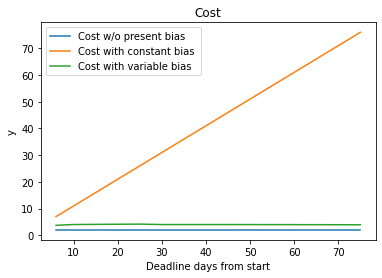

In [20]:
import matplotlib.pyplot as plt


plt.plot(graph_sizes, cost_without_bias_list, label="Cost w/o present bias")
plt.plot(graph_sizes, cost_with_constant_bias_list, label='Cost with constant bias ')
plt.plot(graph_sizes, cost_with_variable_bias_list, label='Cost with variable bias')

plt.xlabel('Deadline days from start')
plt.ylabel('Cost')
plt.title('Traversal cost of task graph for different bias parameters')
plt.legend()
plt.show()